In [1]:
import seaborn
import seaborn.objects as so
import pandas
%matplotlib inline

In [2]:
df = pandas.read_csv('globias_sources.csv')
df.fillna('',inplace=True)

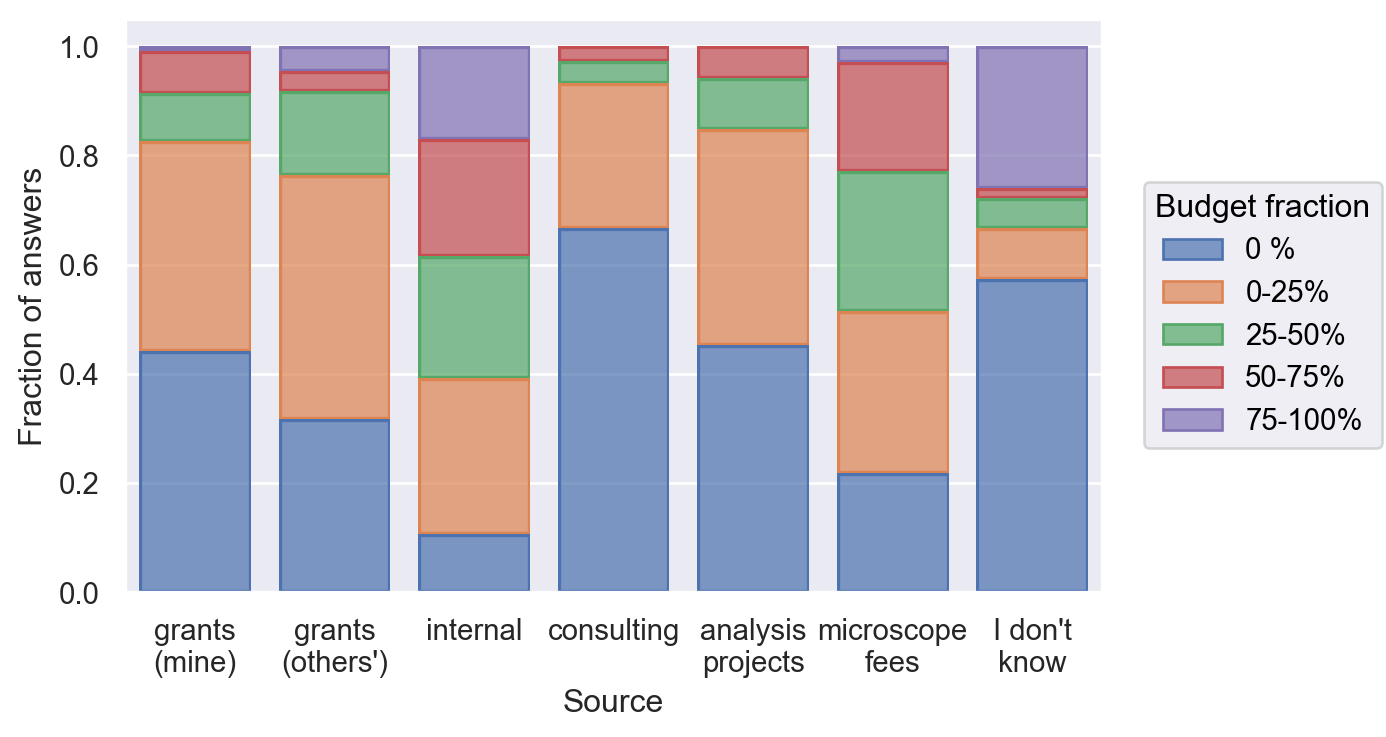

In [10]:
df_list = []
short_colnames = {'grants you apply for':'grants\n(mine)',
                  'grants someone else applies for':'grants\n(others\')',
                  'internal granted funding':'internal',
                  'recharge for consulting':'consulting',
                  'recharge on image analysis projects (data analysis as a service)':'analysis\nprojects',
                  'recharge on other services (e.g. microscope time)':'microscope\nfees',
                  'I don\'t know':"I don\'t\nknow"}
for eachcol in df.columns:
    sub_df=df.query(f'`{eachcol}` != ""') # remove this line to make it not ignore unanswered lines
    normed_df = sub_df[eachcol].value_counts(normalize=True)
    normed_df = normed_df.rename(short_colnames[eachcol])# have to do it here, newlines in the query are sad :(
    df_list.append(normed_df)
normed_df = pandas.concat(df_list,axis=1)
normed_df.fillna(0,inplace=True)

melted = normed_df.melt(ignore_index=False)
melted = melted.reset_index(names='percent')

p = (so.Plot(melted,x='variable',y='value',color='percent')
     .add(so.Bar(), so.Stack())
     .layout(size=(6,4))
     .label(x="Source",y="Fraction of answers",color="Budget fraction")
    )
p.plot()

In [ ]:
melted

In [ ]:
normed_df

In [ ]:


melted = df.melt()
melted = melted.query('value != ""')

In [ ]:
order_list = list(set(melted['value']))
order_list.sort()
order_list

In [ ]:
seaborn.countplot(melted,x='variable',hue='value',stat='proportion',hue_order=order_list)